# EDA - Fuente de datos 2
## Plan Anual de Adquisiones - Secop II

**Distribución de asignaciones:

**Daniela:** Ajuste de NIT, Entidades y contactos - Verificar cuales son las identidades repetidas, ajustarlo y cargar nit en fuente 3

**Daniel:** Localización y descripción - Cruzar Divipola y cargar Geolocalizacion

**Yaliza:** Misión/Vision, Perspectivas - Tokenizacion, analisis del lenguaje, busqueda de transformacion digital  - Revisión de categoria de producto y variable "version"

**David:** Ajuste de fecha, evaluación del mes proyectado, decidir fecha de publicación

**Cristian:** Revisión de variables monetarias, ajuste de presupuesto y revision de precios bases en cero y variables "Referencia"

**Importar librerías.**

In [1]:
# Load Packages
import os,sys
import pandas as pd
import numpy as np
from datetime import datetime


# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

# ETL 1 Fuente 2 - Nits, Entidades y Contratos

En la primera parte vamos a hacer una exploracion a las entidades y nits que tenemos en esta base de datos

In [2]:
df = pd.read_csv ("Fuente_3.csv")
df.head(2)

,Anno,Identificador PAA,Entidad,NIT,Localización,DescripcionUbicacion,Mision/Vision,Perspectiva Estrategica,Presupuesto Menor Cuantia,Presupuesto Minima Cuantia,...,Referencia Operacion,Fecha Publicacion,Modalidad,Contacto,UNSPSC - Codigo Producto,UNSPSC - Nombre Producto,UNSPSC - Codigo Clase,UNSPSC - Nombre Clase,UNSPSC - Codigo Familia,UNSPSC - Nombre Familia
0,2018,CO1.APP.361029,COMANDO DE RECLUTAMIENTO Y CONTROL RESERVAS DE...,800130643,CO-DC-11001,Distrito Capital de Bogotá,MISIÓN: El Comando De Reclutamiento y Control ...,Con el fin de cumplir con la misión institucio...,781242000,78124200,...,131-DIREC-2018,2018-01-11 16:36:51.797000000,CCE-16-Servicios_profesionales_gestion,ELKIN ALONSO ARGOTE HIDALGO,V1.80121700,Servicios de responsabilidad civil,V1.80120000,Servicios legales,V1.80000000,"Servicios de Gestión, Servicios Profesionales ..."
1,2019,CO1.APP.525808,SUPERINTENDENCIA DE TRANSPORTE,800170433,CO-DC-11001,Distrito Capital de Bogotá,"Vigilar, inspeccionar y controlar el cumplimie...",La Superintendencia de Puertos y Transporte vi...,231872480,23187248,...,IPMC 009-2019,2018-12-31 19:59:02.687000000,CCE-10-Minima_Cuantia,MARIA PIERINA GONZALEZ FALLA,V1.53101900,Trajes,V1.53100000,Ropa,V1.53000000,"Ropa, Maletas y Productos de Aseo Personal"


In [3]:
df.dtypes

Anno                            int64
Identificador PAA              object
Entidad                        object
NIT                             int64
Localización                   object
DescripcionUbicacion           object
Mision/Vision                  object
Perspectiva Estrategica        object
Presupuesto Menor Cuantia       int64
Presupuesto Minima Cuantia      int64
Presupuesto Global              int64
Fecha Primera Publicación      object
Mes Proyectado                 object
Identificador Item             object
Categoria Principal            object
Precio Base                   float64
Ultima Fecha Modificacion      object
Version                         int64
Referencia Contrato            object
Referencia Operacion           object
Fecha Publicacion              object
Modalidad                      object
Contacto                       object
UNSPSC - Codigo Producto       object
UNSPSC - Nombre Producto       object
UNSPSC - Codigo Clase          object
UNSPSC - Nom

#  Organizar los datos para una vista minable

In [4]:
# Renombrar las columnas 
df  = df.rename(columns={
     'Anno':                        "year", 
     'Identificador PAA':           "id_paa",
     'Entidad':                     "entidad",
     'NIT':                         "nit",
     'Localización':                "localizacion",
     'DescripcionUbicacion':        "localizacion_desc",
     'Mision/Vision':               "mision_vision",
     'Perspectiva Estrategica':     "pers_estrategica",
     'Presupuesto Menor Cuantia':   "ppto_menor_cuantia",
     'Presupuesto Minima Cuantia':  "ppto_min_cuantia",
     'Presupuesto Global':          "ppto_global",
     'Fecha Primera Publicación':   "date_first_publication",
     'Mes Proyectado':              "mes_proyectado",
     'Identificador Item':          "id_item",
     'Categoria Principal':         "categoria_principal",
     'Precio Base':                 "precio_base",
     'Ultima Fecha Modificacion':   "date_last_publication",
     'Version':                     "version",
     'Referencia Contrato':         "ref_contrato",
     'Referencia Operacion':        "ref_operacion",
     'Fecha Publicacion':           "date_publised",
     'Modalidad':                   "modalidad",
     'Contacto':                    "contacto",
     'UNSPSC - Codigo Producto':    "cod_producto", 
     'UNSPSC - Nombre Producto':    "nombre_producto", 
     'UNSPSC - Codigo Clase':       "cod_clase",  
     'UNSPSC - Nombre Clase':       "nombre_clase", 
     'UNSPSC - Codigo Familia':     "cod_familia", 
     'UNSPSC - Nombre Familia':     "nombre_familia"
})

In [5]:
print(list(df.columns))

['year', 'id_paa', 'entidad', 'nit', 'localizacion', 'localizacion_desc', 'mision_vision', 'pers_estrategica', 'ppto_menor_cuantia', 'ppto_min_cuantia', 'ppto_global', 'date_first_publication', 'mes_proyectado', 'id_item', 'categoria_principal', 'precio_base', 'date_last_publication', 'version', 'ref_contrato', 'ref_operacion', 'date_publised', 'modalidad', 'contacto', 'cod_producto', 'nombre_producto', 'cod_clase', 'nombre_clase', 'cod_familia', 'nombre_familia']


In [6]:
 # Validar los valores únicos de las variables
df.nunique(axis=0)
print(df.nunique(axis=0))

year                           5
id_paa                      2091
entidad                     1057
nit                          941
localizacion                 316
localizacion_desc             33
mision_vision               1648
pers_estrategica            1524
ppto_menor_cuantia           242
ppto_min_cuantia             211
ppto_global                 2086
date_first_publication      2091
mes_proyectado                13
id_item                   241220
categoria_principal         6192
precio_base                71796
date_last_publication        827
version                      174
ref_contrato              198629
ref_operacion             198667
date_publised               2091
modalidad                     13
contacto                    1643
cod_producto                6192
nombre_producto             6177
cod_clase                   1856
nombre_clase                1852
cod_familia                  414
nombre_familia               413
dtype: int64


Como vemos aqui tenemos 1057 entidades unicas y 941 nits por lo que tendremos entidades con los mismos nits, vamos a identificar cuales son 

 ¿Cómo identificar los 116 nombres que tienen un NIT ya utilizado?

Primero las filtramos todas

In [7]:
df_pivot = pd.pivot_table(df,index=["entidad"],values=["nit"])
print(df_pivot)
df_pivot.dtypes

                                                           nit
entidad                                                       
ADMINISTRADORA DE LOS RECURSOS DEL SISTEMA GENE...   901037916
AGENCIA DE DESARROLLO RURAL                          900948958
AGENCIA DE EDUCACIÓN POSTSECUNDARIA DE MEDELLÍN...   900602106
AGENCIA DE RENOVACION DEL TERRITORIO                 901006886
AGENCIA LOGISTICA DE LAS FUERZAS MILITARES           899999162
...                                                        ...
UNIDAD PRESTADORA DE SALUD CÓRDOBA                   900800975
UNIDAD PRESTADORA DE SALUD NARIÑO                    900807338
UNIDAD PRESTADORA DE SALUD NORTE DE SANTANDER -...   900259415
UNIVERSIDAD DE CUNDINAMARCA                         8906800622
VEEDURIA DISTRITAL                                   899999061

[1057 rows x 1 columns]


nit    int64
dtype: object

In [8]:
# Select all duplicate rows based on one column
duplicateRowsDF = df_pivot[df_pivot.duplicated(['nit'])]
print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on a single column are:
                                                          nit
entidad                                                      
ALCALDIA LOCAL DE CIUDAD BOLIVAR                    899999061
ALCALDIA LOCAL DE ENGATIVÁ                          899999061
ALCALDIA LOCAL DE FONTIBON                          899999061
ALCALDIA LOCAL DE KENNEDY                           899999061
ALCALDIA LOCAL DE MARTIRES                          899999061
...                                                       ...
UNIDAD PRESTADORA DE SALUD ARAUCA - DEPARTAMENT...  800140602
UNIDAD PRESTADORA DE SALUD CÓRDOBA                  900800975
UNIDAD PRESTADORA DE SALUD NARIÑO                   900807338
UNIDAD PRESTADORA DE SALUD NORTE DE SANTANDER -...  900259415
VEEDURIA DISTRITAL                                  899999061

[116 rows x 1 columns]


In [9]:
indice_nit = pd.read_csv('indice_nit.csv', encoding= 'unicode_escape')
indice_nit.head()

,NIT,Entidad
0,40330032,BARBARA IVONNE LINARES RODRIGUEZ
1,88143760,SAID ALONSO PENALOZA ANTELIZ
2,123456780,NO UTILIZAR
3,800005042,CONTRALORIA MUNICIPAL DE FLORIDABLANCA
4,800006850,HOSPITAL MARIO GAITAN YANGUAS E.S.E


In [10]:
indice_nit  = indice_nit.rename(columns={'NIT': "nit",
                                        'entidad': "entidad_matriz"}) 
indice_nit

,nit,Entidad
0,40330032,BARBARA IVONNE LINARES RODRIGUEZ
1,88143760,SAID ALONSO PENALOZA ANTELIZ
2,123456780,NO UTILIZAR
3,800005042,CONTRALORIA MUNICIPAL DE FLORIDABLANCA
4,800006850,HOSPITAL MARIO GAITAN YANGUAS E.S.E
...,...,...
936,9008012094,POLICIAMETROPOLITANA DE TUNJA
937,9008529985,AGENCIA NACIONAL DE SEGURIDAD VIAL
938,9009585649,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E
939,9011548528,SOCIEDAD PUBLICA TERMINAL REGIONAL DE TRANSPOR...


In [11]:
from pandas import DataFrame, merge

In [12]:
df = indice_nit.merge(df, on='nit', how='left')
df.head(5)

,nit,Entidad,year,id_paa,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_menor_cuantia,...,ref_operacion,date_publised,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia
0,40330032,BARBARA IVONNE LINARES RODRIGUEZ,2019,CO1.APP.361052,BARBARA IVONNE LINARES RODRIGUEZ,CO-MET,Meta,El municipio de La Macarena será en el 2027 un...,Un Gobierno que responda oportuna y eficientem...,231872480,...,LP-2019-003,2019-01-17 23:25:09.063000000,CCE-17-Licitacion_Publica_Obra_Publica,cesar humberto peña quintero,V1.72141100,Servicios de pavimentación y superficies de ed...,V1.72140000,Servicios de construcción pesada,V1.72000000,"Servicios de Edificación, Construcción de Inst..."
1,88143760,SAID ALONSO PENALOZA ANTELIZ,2018,CO1.APP.193629,SAID ALONSO PEÑALOZA ANTELIZ,CO-NSA-54498,Norte de Santander,Promover el desarrollo humano y sostenible del...,"En el año 2025, El Municipio de Ocaña será una...",218747844,...,SG 001 DEL 2018,2018-01-12 23:51:18.550000000,NaN,RUBEN DARIO BAYONA RIBON,V1.78102203,"Servicios de envío, recogida o entrega de correo",V1.78102200,Servicios postales de paqueteo y courrier,V1.78100000,Transporte de correo y carga
2,123456780,NO UTILIZAR,2016,CO1.APP.11902,NO UTILIZAR,CO-DC-11001,Distrito Capital de Bogotá,"Misión\nLograr una EDUCACIÓN DE CALIDAD, que f...",Objetivos Misionales\n\nBrindar educación ini...,689454000,...,SA-MEN-02-2016,2016-02-17 22:42:09.700000000,CCE-05-Contratacion_Directa,RUBEN DARIO CASTAÑO,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos
3,800005042,CONTRALORIA MUNICIPAL DE FLORIDABLANCA,2017,CO1.APP.155102,CONTRALORIA MUNICIPAL DE FLORIDABLANCA,CO-SAN-68276,Santander,MISIÓN: Fortalecer el control y la vigilancia ...,1.Fortalecer la vigilancia y el control fiscal...,206560760,...,D-001-2017,2017-01-23 22:04:32.327000000,CCE-05-Contratacion_Directa,GLORIA RAQUEL GOMEZ URIBE,V1.80131502,Arrendamiento de instalaciones comerciales o i...,V1.80131500,Alquiler y arrendamiento de propiedades o edif...,V1.80130000,Servicios inmobiliarios
4,800006850,HOSPITAL MARIO GAITAN YANGUAS E.S.E,2019,CO1.APP.372454,HOSPITAL MARIO GAITÁN YANGUAS E.S.E,CO-CUN-25754,Cundinamarca,Misión\n\nSomos una institución pública presta...,La ESE Ese Hospital Mario Gaitán del municipio...,165623200,...,INVITACIÓN A COTIZAR No. 011 DE 2019,2019-01-31 22:00:28.763000000,CCE-11-Procedimiento_Publicidad,PEDRO ENRIQUE CHAVES CHAVES,V1.76121600,Disposición de desechos no peligrosos,V1.76120000,Eliminación y tratamiento de desechos,V1.76000000,"Servicios de Limpieza, Descontaminación y Trat..."


In [13]:
# Select all duplicate rows based on one column
duplicateRowsDF = df_pivot[df_pivot.duplicated(['nit'])]
print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on a single column are:
                                                          nit
entidad                                                      
ALCALDIA LOCAL DE CIUDAD BOLIVAR                    899999061
ALCALDIA LOCAL DE ENGATIVÁ                          899999061
ALCALDIA LOCAL DE FONTIBON                          899999061
ALCALDIA LOCAL DE KENNEDY                           899999061
ALCALDIA LOCAL DE MARTIRES                          899999061
...                                                       ...
UNIDAD PRESTADORA DE SALUD ARAUCA - DEPARTAMENT...  800140602
UNIDAD PRESTADORA DE SALUD CÓRDOBA                  900800975
UNIDAD PRESTADORA DE SALUD NARIÑO                   900807338
UNIDAD PRESTADORA DE SALUD NORTE DE SANTANDER -...  900259415
VEEDURIA DISTRITAL                                  899999061

[116 rows x 1 columns]


Hasta el momento este ETL nos ha dado dos resultados el primero es poder identificar todas las entidades con el mismo nit como vemos en la tabla anterior y el segundo es que quitaremos de la base de datos las empresas que realmente no son reales como las que tienen nit de 123456789


In [14]:
print("cantidad de datos antes de quitar los que no nos sirven",len(df))
df = df.drop(df[df['Entidad']=="NO UTILIZAR"].index)
print("cantidad de datos despues de quitar los que no nos sirven",len(df))

cantidad de datos antes de quitar los que no nos sirven 863969
cantidad de datos despues de quitar los que no nos sirven 863968


Ahorra analizaremos los tipos de contratos que tenemos en esta fuente y cuales son utiles o no para la segmentacion que estamos realizando


In [15]:
# Agrupado por Modalidad de Contratación
print('\033[1m' + "modalidad" + '\033[0m')
print(df.modalidad.unique())

modalidad
['CCE-17-Licitacion_Publica_Obra_Publica' nan
 'CCE-05-Contratacion_Directa' 'CCE-11-Procedimiento_Publicidad'
 'CCE-16-Servicios_profesionales_gestion'
 'CCE-06-Seleccion_Abreviada_Menor_Cuantia'
 'CCE-15-Procedimiento_Publicidad_with_ProposalsPhase'
 'CCE-07-Seleccion_Abreviada_Subasta' 'CCE-10-Minima_Cuantia'
 'CCE-02-Licitacion_Publica' 'CCE-04-Concurso_Meritos_Sin_Lista_Corta'
 'CCE-18-Seleccion_Abreviada_Menor_Cuantia_Sin_Manifestacion_Interes'
 'CCE-01-Estudio_Mercado' 'CCE-03-Concurso_Meritos_Con_Lista_Corta']


**Viendo los tipos de contratos que tenemos elimanremos los que en conjunto con el representante de caoba no consideramos utiles para la segmentacion del caso**

In [16]:
print("cantidad de datos antes de quitar los que no nos sirven",len(df))
df=df[df["modalidad"].str.contains("03|04|05|07|10|11|15|17|18")==False]
df.head()
print("cantidad de datos despues de quitar los que no nos sirven",len(df))

cantidad de datos antes de quitar los que no nos sirven 863968
cantidad de datos despues de quitar los que no nos sirven 349682


In [17]:
df.groupby('modalidad').agg({'modalidad':['count']})

,modalidad
,count
modalidad,
CCE-01-Estudio_Mercado,157
CCE-02-Licitacion_Publica,46761
CCE-06-Seleccion_Abreviada_Menor_Cuantia,86249
CCE-16-Servicios_profesionales_gestion,216515


**La conclucion de este ETL es**


# ETL 2 - Fechas

In [18]:
 # Variable year
print('\033[1m' + "year" + '\033[0m')
print(sorted(df.year.unique()))

# Variable mes_proyectado
print('\033[1m' + "\nMes Proyectado" + '\033[0m')
print(df.mes_proyectado.unique())

year
[2016, 2017, 2018, 2019, 2020]

Mes Proyectado
['Enero' 'Julio' 'Febrero' 'Abril' 'Diciembre' 'Marzo' 'Octubre'
 'Septiembre' 'Junio' 'Agosto' 'Noviembre' 'Mayo' 'No Definido']


Podemos ver como los contratos suceden durante 5 años y en todos los meses de estos

In [19]:
 # 3 variables de fecha completa
df[['date_first_publication','date_last_publication','date_publised']].head(10)

,date_first_publication,date_last_publication,date_publised
22,2019-01-09 18:06:28.570000000,Jan 9 2019 6:06PM,2019-01-09 18:06:28.570000000
41,2018-12-29 01:24:49.073000000,12/27/2019,2018-12-29 01:24:49.073000000
75,2019-01-11 15:10:41.077000000,02/13/2019,2019-01-11 15:10:41.077000000
76,2019-01-11 15:10:41.077000000,02/13/2019,2019-01-11 15:10:41.077000000
77,2019-01-11 15:10:41.077000000,02/13/2019,2019-01-11 15:10:41.077000000
78,2019-01-11 15:10:41.077000000,02/13/2019,2019-01-11 15:10:41.077000000
79,2019-01-11 15:10:41.077000000,02/13/2019,2019-01-11 15:10:41.077000000
80,2019-01-11 15:10:41.077000000,02/13/2019,2019-01-11 15:10:41.077000000
81,2019-01-11 15:10:41.077000000,02/13/2019,2019-01-11 15:10:41.077000000
82,2019-01-11 15:10:41.077000000,02/13/2019,2019-01-11 15:10:41.077000000


In [20]:
print(df['mes_proyectado'].value_counts(),'\n', df['mes_proyectado'].value_counts()/len(df))

Enero          140489
Febrero         58028
Marzo           31168
Octubre         19178
Agosto          14404
Abril           13415
Julio           13192
Septiembre      12915
Diciembre       12889
Junio           11474
Noviembre       10914
Mayo            10842
No Definido       774
Name: mes_proyectado, dtype: int64 
 Enero          0.401762
Febrero        0.165945
Marzo          0.089132
Octubre        0.054844
Agosto         0.041192
Abril          0.038363
Julio          0.037726
Septiembre     0.036934
Diciembre      0.036859
Junio          0.032813
Noviembre      0.031211
Mayo           0.031005
No Definido    0.002213
Name: mes_proyectado, dtype: float64


Para propositos de entendimiento de ahora en adelante remplzaremos "No definido" por "Enero"

In [21]:
df['mes_proyectado'].replace('No Definido','Enero', inplace=True)
df['mes_proyectado'].value_counts()

Enero         141263
Febrero        58028
Marzo          31168
Octubre        19178
Agosto         14404
Abril          13415
Julio          13192
Septiembre     12915
Diciembre      12889
Junio          11474
Noviembre      10914
Mayo           10842
Name: mes_proyectado, dtype: int64

In [22]:
fechas_pub=np.where(df['date_first_publication']==df['date_publised'],True,False)
print(fechas_pub)

[ True  True  True ...  True  True  True]



En nuestro analisis concluimos que la columna "'date_first_publication'" no es util por lo que la quitaremos



In [23]:
df = df.drop(['date_first_publication'], axis=1)
df.shape
    


(349682, 29)

In [24]:
df[['date_last_publication','date_publised']].dtypes

date_last_publication    object
date_publised            object
dtype: object

Ahora vamos a estandarizar los tipos de fechas diferentes

In [25]:
df[['date_last_publication','date_publised']]=df[['date_last_publication','date_publised']].astype('datetime64[ns]')
df['date_last_publication'].head()

22   2019-01-09 18:06:00
41   2019-12-27 00:00:00
75   2019-02-13 00:00:00
76   2019-02-13 00:00:00
77   2019-02-13 00:00:00
Name: date_last_publication, dtype: datetime64[ns]

In [26]:
df['date_publised'].head() 

22   2019-01-09 18:06:28.570
41   2018-12-29 01:24:49.073
75   2019-01-11 15:10:41.077
76   2019-01-11 15:10:41.077
77   2019-01-11 15:10:41.077
Name: date_publised, dtype: datetime64[ns]

In [27]:
# Ajustar el formato de 'date_publised' a año-mes-dia
df['date_publised']=df['date_publised'].dt.strftime('%d/%m/%Y')
df['date_publised']=pd.to_datetime(df['date_publised'],format='%d/%m/%Y')
df['date_publised'].head()

22   2019-01-09
41   2018-12-29
75   2019-01-11
76   2019-01-11
77   2019-01-11
Name: date_publised, dtype: datetime64[ns]

Consideremos los días entre los 2 campos 'date_last_publication' y 'date_publised':

In [28]:
df['diff_dates']=(df['date_last_publication']-df['date_publised']).dt.days
df['diff_dates'].head(5)

22      0
41    363
75     33
76     33
77     33
Name: diff_dates, dtype: int64

In [29]:
 print(sorted(df.diff_dates.unique()))

[0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 62, 63, 69, 70, 71, 74, 77, 79, 80, 83, 84, 87, 90, 91, 92, 95, 97, 98, 99, 103, 104, 105, 106, 107, 108, 109, 110, 111, 116, 118, 119, 120, 123, 126, 127, 128, 129, 130, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 151, 152, 158, 160, 161, 163, 166, 167, 168, 170, 172, 173, 175, 178, 179, 180, 181, 182, 184, 185, 186, 188, 189, 190, 193, 195, 196, 197, 198, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 218, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 245, 247, 248, 250, 251, 252, 253, 255, 256, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,

In [30]:
 # Descripción de la nueva variable 'diff_dates'
df['diff_dates'].describe()

count    349682.000000
mean        347.711263
std          60.847493
min           0.000000
25%         347.000000
50%         366.000000
75%         366.000000
max        1204.000000
Name: diff_dates, dtype: float64

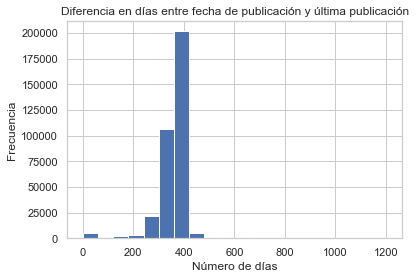

In [31]:
df['diff_dates'].plot(kind='hist', bins=20)
plt.title('Diferencia en días entre fecha de publicación y última publicación')
plt.ylabel('Frecuencia')
plt.xlabel('Número de días')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


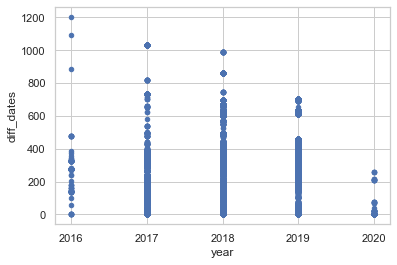

In [32]:
df[['year','diff_dates']].plot(kind='scatter',x='year',y='diff_dates')
plt.xticks(np.linspace(2016,2020,5,endpoint=True))
plt.show()

 Comparación entre año de presupuesto (PAA) y año de publicación

In [33]:
df['year_publised'] = pd.DatetimeIndex(df['date_publised']).year
df['year_publised'].head()

22    2019
41    2018
75    2019
76    2019
77    2019
Name: year_publised, dtype: int64

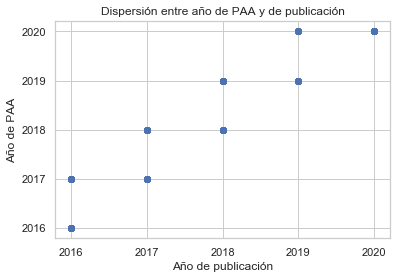

In [34]:
plt.scatter(df['year_publised'],df['year'])
plt.title('Dispersión entre año de PAA y de publicación')
plt.ylabel('Año de PAA')
plt.xlabel('Año de publicación')
plt.xticks(np.linspace(2016,2020,5,endpoint=True))
plt.yticks(np.linspace(2016,2020,5,endpoint=True))
plt.show()

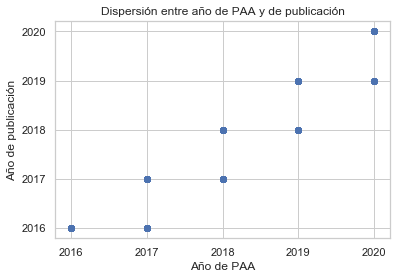

In [35]:
plt.scatter(df['year'],df['year_publised'])
plt.title('Dispersión entre año de PAA y de publicación')
plt.xlabel('Año de PAA')
plt.ylabel('Año de publicación')
plt.xticks(np.linspace(2016,2020,5,endpoint=True))
plt.yticks(np.linspace(2016,2020,5,endpoint=True))
plt.show()
 

 Agrupemos algunas variables por fechas:

In [36]:
 df.groupby(["year", 'year_publised'])["modalidad"].count()

year  year_publised
2016  2016                138
2017  2016                 31
      2017               4209
2018  2017               9252
      2018             278399
2019  2018               7275
      2019              49971
2020  2019                  6
      2020                401
Name: modalidad, dtype: int64

# ETL 3 - Municipios

**Importar la base de datos (CSV).** de divipola para poder cruzarlos

In [37]:
df2= pd.read_excel('Divipola.xlsx', header=0)
df3= pd.read_excel('dptos.xlsx', header=0)

print(consolidado[2])

In [38]:
df.head(5)

,nit,Entidad,year,id_paa,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_menor_cuantia,...,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia,diff_dates,year_publised
22,800010350,ALCALDIA MUNICIPAL DE MURILLO,2019,CO1.APP.355610,ALCALDIA MUNICIPAL DE MURILLO,CO-TOL-73461,Tolima,MISION: Proveer los instrumentos necesarios pa...,Lograr la estructuración del plan de compras 2...,231872420,...,CCE-16-Servicios_profesionales_gestion,Monica Andrea Hernandez Salinas,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,0,2019
41,800012873,MUNICIPIO DE TAURAMENA,2019,CO1.APP.541702,MUNICIPIO DE TAURAMENA,CO-CAS-85410,Casanare,MISIÓN: Prestar servicio efectivo a la comunid...,"La Alcaldía municipal de Tauramena Casanare, t...",231872480,...,CCE-06-Seleccion_Abreviada_Menor_Cuantia,MARIA EUGENIA RODRIGUEZ FIGUEREDO,V1.93141506,Servicios de bienestar social,V1.93141500,Desarrollo y servicios sociales,V1.93140000,Servicios comunitarios y sociales,363,2018
75,800022620,BOMBEROS DE BUCARAMANGA,2019,CO1.APP.378555,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,231872480,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
76,800022620,BOMBEROS DE BUCARAMANGA,2019,CO1.APP.378555,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,231872480,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
77,800022620,BOMBEROS DE BUCARAMANGA,2019,CO1.APP.378555,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,231872480,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019


In [39]:
df2.head(5) #DF para cruzar con divipola

,Nombre,Código,LATITUD,LONGITUD
0,MEDELLÍN,5001,6.257590,-75.611031
1,ABEJORRAL,5002,5.803728,-75.438474
2,ABRIAQUÍ,5004,6.627569,-76.085978
3,ALEJANDRÍA,5021,6.365534,-75.090597
4,AMAGÁ,5030,6.032922,-75.708003


In [40]:
df3.head(5) #Si vemos nuestros datos hay algunos que no tienen codigo, pero tienen el departamento
# a estos les pondremos la capital del departamento como su municipio

,Departamento,Municipio,Latitudo,Longitud
0,Distrito Capital de Bogotá,"BOGOTÁ, D.C.",4.316108,-74.181073
1,Amazonas,LETICIA,-3.530059,-70.045137
2,Antioquía,MEDELLÍN,6.257590,-75.611031
3,Arauca,ARAUCA,6.796281,-70.509212
4,Atlántico,BARRANQUILLA,10.981521,-74.827715


**Lo primero que vamos a hacer es que vamos a eliminar las entidades que no tienen informacion alguna sobre su localizacion
ya que estas en general son ministerios del gobierno y para el analisis no son muy utiles**


In [41]:
print("cantidad de datos antes de quitar los que no nos sirven",len(df))
df.dropna(inplace=True)
df = df.drop(df[df['localizacion_desc']=="No Definido"].index)
print("cantidad de datos despues de quitar los que no nos sirven",len(df))

cantidad de datos antes de quitar los que no nos sirven 349682
cantidad de datos despues de quitar los que no nos sirven 348130


# saltarse de aqui a donde se importan los datos cruzados

In [42]:
## Codigo para por si uno fuera a cruzar ubicacion con valor de cada contrato unico
# Tarda muchoooooooo aprox 2 horas. saltarse de aqui a donde se importan los datos cruzados

datos=[]
uwu=[]
owo=[]

for i in range(len(df2)):
    x1=df2.iloc[i,0]
    x2=int(df2.iloc[i,1])
    if x2<10000:
        x2="0"+str(x2)
    else:
        x2=str(x2)
    x3=df2.iloc[i,2]
    x4=df2.iloc[i,3]
    lista=[x1,x2,x3,x4]
    uwu.append(x1)
    uwu.append(x2)
    uwu.append(x3)
    uwu.append(x4)
    
for i in range(len(df3)):
    x1=df3.iloc[i,0]
    x2=df3.iloc[i,1]
    x3=df3.iloc[i,2]
    x4=df3.iloc[i,3]
    owo.append(x1)
    owo.append(x2)
    owo.append(x3)
    owo.append(x4)
    
    


for i in range(len(df)):
    x1=df.iloc[i,1] #Nombre
    x2=df.iloc[i,5] #Codigo
    if len(x2)>8:
        codigo=x2[-5:]
    else:
        codigo=x2

    x=float(df.iloc[i,11]) #PPTO global
    y=float(df.iloc[i,15]) #Precio base
    x3=df.iloc[i,21] #Tipo contrato
    x4=df.iloc[i,24] #Producto
    x5=df.iloc[i,28] #Familia
    lista=[x1,x2,x3,x4,x5,x,y]
    
    if codigo in uwu:
        l=uwu.index(codigo)
        lista.append(uwu[l-1])
        lista.append(uwu[l+1])
        lista.append(uwu[l+2])
    else:
        o=df.iloc[i,6]
        if o in owo:
            l=owo.index(o)
            lista.append(owo[l+1])
            lista.append(owo[l+2])
            lista.append(owo[l+3])
            
        else:
            lista.append(df.iloc[i,6]) #localizacion
            lista.append(0.0)
            lista.append(0.0)
        

    datos.append(lista)

In [43]:
#Este tampoco se corre
print(datos[0])

['ALCALDIA MUNICIPAL DE MURILLO', 'CO-TOL-73461', 'CCE-16-Servicios_profesionales_gestion', 'Servicios temporales de recursos humanos', 'Servicios de recursos humanos', 2971812351.0, 19946667.0, 'MURILLO', 4.826734468, -75.219939865]


In [44]:
#Este tampoco se corre, solo una vez

nombre=[]
codigo=[]
tipo=[]
articulo=[]
grupo=[]
Ptp=[]
Base=[]
municipio=[]
latitud=[]
longitud=[]


for i in range(len(df)):
    nombre.append(datos[i][0])
    codigo.append(datos[i][1])
    tipo.append(datos[i][2])
    articulo.append(datos[i][3])
    grupo.append(datos[i][4])
    Ptp.append(datos[i][5])
    Base.append(datos[i][6])
    municipio.append(datos[i][7])
    latitud.append(datos[i][8])
    longitud.append(datos[i][9])
        
data = {'Entidad': nombre ,"Codigo":codigo,"Tipo_Contrato":tipo,"Articulo":articulo,"Grupo_Contrato":grupo,"Presupuesto Global":Ptp,"Precio Base":Base,"Municipio":municipio,"Latitud":latitud,"Longintud":longitud} 
df3 = pd.DataFrame(data)
print(len(df),len(df3))



348130 348130


In [45]:
#tampoco se corre
df3.to_csv(r'ETL_Municipios.csv', index = False) #Exportamos ya todos los contratos con su localizacion (los que se podian) para 
#no tener que correr el codigo denuevo

,nit,Entidad,year,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_global,mes_proyectado,...,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia,diff_dates,year_publised
22,800010350,ALCALDIA MUNICIPAL DE MURILLO,2019,ALCALDIA MUNICIPAL DE MURILLO,CO-TOL-73461,Tolima,MISION: Proveer los instrumentos necesarios pa...,Lograr la estructuración del plan de compras 2...,2971812351,Enero,...,CCE-16-Servicios_profesionales_gestion,Monica Andrea Hernandez Salinas,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,0,2019
41,800012873,MUNICIPIO DE TAURAMENA,2019,MUNICIPIO DE TAURAMENA,CO-CAS-85410,Casanare,MISIÓN: Prestar servicio efectivo a la comunid...,"La Alcaldía municipal de Tauramena Casanare, t...",114339387326,Julio,...,CCE-06-Seleccion_Abreviada_Menor_Cuantia,MARIA EUGENIA RODRIGUEZ FIGUEREDO,V1.93141506,Servicios de bienestar social,V1.93141500,Desarrollo y servicios sociales,V1.93140000,Servicios comunitarios y sociales,363,2018
75,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
76,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
77,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
78,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
79,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
80,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...",33,2019
81,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCE

**Vista minable**

In [48]:
df.to_pickle("Fuente_2_vista_minable.pickle")

In [49]:
df3.to_pickle("Fuente_2_Municiplos_minable.pickle")

# Importacion de datos

In [121]:
#Resultados del cruze y de los codigos

dfDIV = pd.read_csv(r'ETL_Municipios.csv')
df=df.drop(['id_paa', 'ppto_menor_cuantia', 'ppto_min_cuantia','id_item', 'categoria_principal', 'version','ref_operacion'], axis=1)
df.head(10)



In [122]:
dfDIV.head(5)

,Entidad,Codigo,Tipo_Contrato,Articulo,Grupo_Contrato,Presupuesto Global,Precio Base,Municipio,Latitud,Longintud
0,ALCALDIA MUNICIPAL DE MURILLO,CO-TOL-73461,CCE-16-Servicios_profesionales_gestion,Servicios temporales de recursos humanos,Servicios de recursos humanos,2.971812e+09,19946667.0,MURILLO,4.826734,-75.219940
1,MUNICIPIO DE TAURAMENA,CO-CAS-85410,CCE-06-Seleccion_Abreviada_Menor_Cuantia,Servicios de bienestar social,Servicios comunitarios y sociales,1.143394e+11,57250000.0,TAURAMENA,4.697464,-72.629224
2,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,CCE-16-Servicios_profesionales_gestion,Desarrollo de recursos humanos,"Servicios de Gestión, Servicios Profesionales ...",1.092601e+10,49500000.0,BUCARAMANGA,7.155834,-73.111570
3,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,CCE-16-Servicios_profesionales_gestion,Servicios de personal temporal,"Servicios de Gestión, Servicios Profesionales ...",1.092601e+10,18000000.0,BUCARAMANGA,7.155834,-73.111570
4,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,CCE-16-Servicios_profesionales_gestion,Servicios de personal temporal,"Servicios de Gestión, Servicios Profesionales ...",1.092601e+10,18000000.0,BUCARAMANGA,7.155834,-73.111570


In [123]:
print(dfDIV['Municipio'].value_counts())

BOGOTÁ, D.C.    297340
IBAGUÉ           16505
ENVIGADO          4505
MEDELLÍN          3232
BUCARAMANGA       3104
                 ...  
ZAPATOCA             1
AGUAZUL              1
HATO                 1
PENSILVANIA          1
MONGUÍ               1
Name: Municipio, Length: 131, dtype: int64


# ETL 4 Presupuestos con municipios y departamentos

In [124]:
dfDIV.shape

(348130, 10)

In [125]:
dfDIV.dtypes

Entidad                object
Codigo                 object
Tipo_Contrato          object
Articulo               object
Grupo_Contrato         object
Presupuesto Global    float64
Precio Base           float64
Municipio              object
Latitud               float64
Longintud             float64
dtype: object

In [126]:
# Renombrar las columnas 
dfDIV  = dfDIV.rename(columns={
     'Entidad':                     "entidad", 
     'Codigo':                      "cod",
     'Tipo_Contrato':               "tipo_contra",
     'Articulo':                    "articulo",
     'Grupo_Contrato':              "localizacion",
     'Presupuesto Global':          "ppto_global",
     'Precio Base':                 "precio_base",
     'Municipio':                   "municipio",
     'Latitud':                     "latitud",
     'Longintud':                   "longitud",
})   

In [127]:
print(list(dfDIV.columns))

['entidad', 'cod', 'tipo_contra', 'articulo', 'localizacion', 'ppto_global', 'precio_base', 'municipio', 'latitud', 'longitud']


In [128]:
# Validar los valores únicos de las variables
dfDIV.nunique(axis=0)
print(dfDIV.nunique(axis=0))

entidad           564
cod               157
tipo_contra         4
articulo         2927
localizacion      341
ppto_global      1301
precio_base     30697
municipio         131
latitud           128
longitud          128
dtype: int64


In [129]:
dfDIVF= dfDIV.filter(items=['municipio','precio_base', 'ppto_global' ] )

In [130]:
dfDIVF2= dfDIV.filter(items=['municipio','entidad' ] )

In [131]:
dfDIVF.head()

,municipio,precio_base,ppto_global
0,MURILLO,19946667.0,2.971812e+09
1,TAURAMENA,57250000.0,1.143394e+11
2,BUCARAMANGA,49500000.0,1.092601e+10
3,BUCARAMANGA,18000000.0,1.092601e+10
4,BUCARAMANGA,18000000.0,1.092601e+10


In [132]:
dfDIVF.groupby('municipio').agg({'precio_base':['count','mean','median','min', 'max']})

precio_base                                                    
                count          mean      median         min           max
municipio                                                                
AGUACHICA           4  3.100000e+06   2800000.0   2800000.0  4.000000e+06
AGUAZUL             1  3.670000e+07  36700000.0  36700000.0  3.670000e+07
ANOLAIMA           90  3.235431e+06   1300000.0     16422.0  8.000000e+07
APARTADÓ           40  1.463045e+08  35000000.0   1000000.0  1.063665e+09
APULO               2  1.430000e+07  14300000.0  14300000.0  1.430000e+07
...               ...           ...         ...         ...           ...
VÉLEZ              27  7.469630e+07  36000000.0  12000000.0  8.600000e+08
YOPAL            1731  3.250159e+07  19404000.0     44080.0  2.423681e+09
ZAPATOCA            1  4.199889e+07  41998891.0  41998891.0  4.199889e+07
ZIPACÓN             2  8.372207e+07  83722072.5  82444145.0  8.500000e+07
ZIPAQUIRÁ          14  2.513665e+07  26633333.5   6000000.0  4.533333e+07

[131 rows x 5 columns]

In [133]:
dfDIVF.groupby(['municipio']).agg({'precio_base':'mean'}).sort_values(by='precio_base',ascending=False).head(20)

,precio_base
municipio,
POPAYÁN,7.384409e+09
"BOGOTÁ, D.C.",3.572940e+09
HATO,2.793938e+09
TUNJA,1.912497e+09
LETICIA,1.460388e+09
PIEDECUESTA,1.422021e+09
PASTO,1.416229e+09
CHÍA,1.401560e+09
LA JAGUA DE IBIRICO,1.321993e+09


Precio base es el presupuesto aprobado para cada contrato ppto_global es el presupuesto aprobado de cada entidad en determinado año

In [134]:
dfDIV.groupby(['municipio','entidad']).agg({'ppto_global':'mean'}).sort_values(by='ppto_global',ascending=False).head(20)

ppto_global
municipio                  entidad                                                         
BOGOTÁ, D.C.               INSTITUTO NACIONAL DE VIAS                          4.362664e+13
                           METRO DE BOGOTA SA                                  2.239431e+13
                           INSTITUTO COLOMBIANO DE BIENESTAR FAMILIAR          7.164981e+12
                           SERVICIO NACIONAL DE APRENDIZAJE SENA               5.762245e+12
                           INSTITUTO DE DESARROLLO URBANO                      5.482501e+12
                           EMPRESA DE TRANSPORTE DEL TERCER MILENIO TRANSM...  4.237967e+12
MEDELLÍN                   DEPARTAMENTO DE ANTIOQUIA                           3.253975e+12
BOGOTÁ, D.C.               EMPRESA FERREA REGIONAL SAS                         2.469187e+12
SAN SEBASTIÁN DE MARIQUITA MUNICIPIO DE MARIQUITA                              2.202846e+12
MEDELLÍN                   MUNICIPIO DE MEDELLIN                               2.091715e+12
IBAGUÉ                     GOBIERNO DEPARTAMENTAL DEL TOLIMA                   1.813910e+12
BOGOTÁ, D.C.               UNIDAD NACIONAL DE PROTECCIN                        1.296265e+12
                           FONDO FINANCIERO DISTRITAL DE SALUD..               1.231016e+12
CALI                       MUNICIPIO DE SANTIAGO DE CALI - DEPARTAMENTO AD...  1.179255e+12
BOGOTÁ, D.C.               MINISTERIO DE HACIENDA Y CREDITO PUBLICO            1.166446e+12
BUCARAMANGA                GOBERNACIN DE SANTANDER                             1.057700e+12
BOGOTÁ, D.C.               UNIDAD ADMINISTRATIVA ESPECIAL DE AERONUTICA C...  1.054268e+12
                           FUERZA AREA COLOMBIANA                              9.590782e+11
                           FONDO UNICO DE TECNOLOGAS DE LA INFORMACION Y ...  9.555087e+11
                           DEPARTAMENTO ADMINISTRATIVO PARA LA PROSPERIDAD...  9.387166e+11

In [135]:
dfDIVF.groupby('municipio').agg({'ppto_global':['count','mean', 'median', 'min', 'max' ]})

ppto_global                                                        
                count          mean        median           min           max
municipio                                                                    
AGUACHICA           4  1.300181e+08  1.350661e+08  1.148742e+08  1.350661e+08
AGUAZUL             1  4.968700e+08  4.968700e+08  4.968700e+08  4.968700e+08
ANOLAIMA           90  8.773690e+08  8.773690e+08  8.773690e+08  8.773690e+08
APARTADÓ           40  3.233424e+09  2.709519e+09  1.055300e+08  7.429742e+09
APULO               2  2.954600e+08  2.954600e+08  2.954600e+08  2.954600e+08
...               ...           ...           ...           ...           ...
VÉLEZ              27  2.250962e+09  2.275903e+09  1.602478e+09  2.275903e+09
YOPAL            1731  2.528577e+11  4.929029e+11  5.719703e+07  4.929029e+11
ZAPATOCA            1  1.098178e+10  1.098178e+10  1.098178e+10  1.098178e+10
ZIPACÓN             2  2.444791e+09  2.444791e+09  8.244414e+07  4.807139e+09
ZIPAQUIRÁ          14  5.480253e+08  5.480253e+08  5.480253e+08  5.480253e+08

[131 rows x 5 columns]

In [136]:
dfDIVF.groupby(['municipio']).agg({'ppto_global':'mean'}).sort_values(by='ppto_global',ascending=False).head(20)

,ppto_global
municipio,
"BOGOTÁ, D.C.",2.662925e+13
MEDELLÍN,1.644206e+12
PARATEBUENO,7.462204e+11
ENVIGADO,2.905952e+11
IBAGUÉ,2.804677e+11
SAN SEBASTIÁN DE MARIQUITA,2.764978e+11
NEIVA,2.574260e+11
YOPAL,2.528577e+11
LA JAGUA DE IBIRICO,2.484337e+11


Filtrado por Municipios

In [137]:
dfDIVF.pivot_table(index="municipio")

,ppto_global,precio_base
municipio,,
AGUACHICA,1.300181e+08,3.100000e+06
AGUAZUL,4.968700e+08,3.670000e+07
ANOLAIMA,8.773690e+08,3.235431e+06
APARTADÓ,3.233424e+09,1.463045e+08
APULO,2.954600e+08,1.430000e+07
...,...,...
VÉLEZ,2.250962e+09,7.469630e+07
YOPAL,2.528577e+11,3.250159e+07
ZAPATOCA,1.098178e+10,4.199889e+07


Concluciones 

# Presupuestos y Precio Base por modalidad de contratación

In [138]:
 import locale
locale.setlocale(locale.LC_ALL, '')

'Spanish_Colombia.1252'

In [139]:
# Agrupado por Modalidad de Contratación
df.groupby('modalidad').agg({'precio_base':['count','mean', 'min', 'max']})

precio_base                         \
                                               count          mean      min   
modalidad                                                                     
CCE-01-Estudio_Mercado                           157  7.685766e+07  82500.0   
CCE-02-Licitacion_Publica                      46731  1.631574e+10      0.0   
CCE-06-Seleccion_Abreviada_Menor_Cuantia       86168  6.445687e+08      0.0   
CCE-16-Servicios_profesionales_gestion        215074  1.202077e+09      0.0   

                                                        
                                                   max  
modalidad                                               
CCE-01-Estudio_Mercado                    6.868984e+08  
CCE-02-Licitacion_Publica                 6.043000e+12  
CCE-06-Seleccion_Abreviada_Menor_Cuantia  2.666667e+12  
CCE-16-Servicios_profesionales_gestion    2.030000e+12

In [140]:
# Agrupado por Departamento
df.groupby('localizacion_desc').agg({'precio_base':['count','mean', 'min', 'max']})

precio_base                           \
                                               count          mean        min   
localizacion_desc                                                               
Amazonas                                         207  1.460388e+09     7000.0   
Antioquia                                       9327  2.553846e+08        0.0   
Arauca                                           122  9.018079e+07  2060000.0   
Atlántico                                       1035  1.281494e+08        0.0   
Bolívar                                          786  2.075858e+08  1200000.0   
Boyacá                                           421  1.861081e+09   815742.0   
Caldas                                           679  4.637851e+08        0.0   
Caquetá                                          616  2.829226e+07     3300.0   
Casanare                                        1738  3.248032e+07    44080.0   
Cauca                                            213  7.384409e+09  1000000.0   
Cesar                                            327  1.640303e+08    25000.0   
Chocó                                             27  2.825111e+08  1851471.0   
Cundinamarca                                    3661  2.018843e+08     2600.0   
Córdoba                                          177  7.153419e+08        0.0   
Distrito Capital de Bogotá                    296407  3.582676e+09        0.0   
Guainía                                           16  1.526016e+08  2000000.0   
Guaviare                                          39  8.831283e+07  2000000.0   
Huila                                           2210  5.667135e+08        0.0   
La Guajira                                       496  2.513026e+07     1844.0   
Magdalena                                       1402  7.071998e+07   622710.0   
Meta                                             924  1.926145e+08     3850.0   
Nariño                                           468  1.370196e+09  2158784.0   
Norte de Santander                                18  3.921892e+08  7761900.0   
Putumayo                                         338  1.028396e+08   100000.0   
Quindío                                          947  1.955217e+08  1000000.0   
Risaralda                                        652  2.561374e+08  1000000.0   
San Andrés, Providencia y Santa Catalina          92  1.145121e+08  1039645.0   
Santander                                       3982  2.760377e+08        0.0   
Sucre                                            100  1.961111e+08    10000.0   
Tolima                                         17796  1.129504e+08        0.0   
Valle del Cauca                                 2749  7.774228e+08        0.0   
Vichada                                          158  5.464359e+08  1500000.0   

                                                        
                                                   max  
localizacion_desc                                       
Amazonas                                  2.974340e+11  
Antioquia                                 7.566618e+10  
Arauca                                    1.370000e+09  
Atlántico                                 7.299077e+09  
Bolívar                                   3.809653e+09  
Boyacá                                    6.846935e+09  
Caldas                                    7.850000e+10  
Caquetá                                   1.200000e+09  
Casanare                                  2.423681e+09  
Cauca                                     5.717311e+10  
Cesar                                     4.506680e+09  
Chocó                                     1.583821e+09  
Cundinamarca                              4.985807e+09  
Córdoba                                   6.764192e+09  
Distrito Capital de Bogotá                6.043000e+12  
Guainía                                   5.869102e+08  
Guaviare                                  3.447549e+08  
Huila                                     1.100000e+10  
La Guaji

In [141]:
# Agrupado Departamento
df.groupby('localizacion_desc').agg({'ppto_global':['count','mean', 'min', 'max']})

ppto_global                \
                                               count          mean   
localizacion_desc                                                    
Amazonas                                         207  1.281903e+10   
Antioquia                                       9327  7.131838e+11   
Arauca                                           122  2.225123e+09   
Atlántico                                       1035  1.537315e+10   
Bolívar                                          786  1.964525e+10   
Boyacá                                           421  3.335524e+10   
Caldas                                           679  8.473917e+10   
Caquetá                                          616  5.880739e+09   
Casanare                                        1738  2.519109e+11   
Cauca                                            213  4.807114e+10   
Cesar                                            327  8.461431e+09   
Chocó                                             27  3.520163e+09   
Cundinamarca                                    3661  5.170908e+10   
Córdoba                                          177  6.968896e+09   
Distrito Capital de Bogotá                    296407  2.671281e+13   
Guainía                                           16  1.573867e+09   
Guaviare                                          39  1.401254e+09   
Huila                                           2210  1.813125e+11   
La Guajira                                       496  1.134623e+10   
Magdalena                                       1402  1.740970e+10   
Meta                                             924  6.935503e+09   
Nariño                                           468  6.505559e+09   
Norte de Santander                                18  3.254126e+10   
Putumayo                                         338  2.495993e+10   
Quindío                                          947  1.172959e+10   
Risaralda                                        652  2.490267e+10   
San Andrés, Providencia y Santa Catalina          92  6.058956e+09   
Santander                                       3982  1.505491e+11   
Sucre                                            100  2.025402e+10   
Tolima                                         17796  2.614900e+11   
Valle del Cauca                                 2749  3.001414e+10   
Vichada                                          158  1.414528e+11   

                                                                      
                                                 min             max  
localizacion_desc                                                     
Amazonas                                    46399800    299475116342  
Antioquia                                   70328614   4795107392157  
Arauca                                      54660901      9840052910  
Atlántico                                  166057724     24281475385  
Bolívar                                    112729909     31844304193  
Boyacá                                       8600000     92567635450  
Caldas                                     148580819    433988421275  
Caquetá                                     97164733     13927267502  
Casanare                                    57197029    492902912396  
Cauca                                      146367631    141344325265  
Cesar                                      114874191    490334388090  
Chocó                                      109042353      4665360896  
Cundinamarca                                41800000    746220434350  
Córdoba                                     93980612     16472017767  
Distrito Capital de Bogotá                  15988675  43742086136009  
Guainía                                    434457448      1984808867  
Guaviare                                    27424600      2737008006  
Huila                                      133674785    363412560324  
La Guajira                                 102389641     20925018430  
Magdalena                   

## **A continuación se filtra el Dataframe por medio da las Variables precio_base	ppto_global con respecto al año**

In [142]:
A= df[['year','precio_base','ppto_global']]

In [143]:
A.head(20)

,year,precio_base,ppto_global
22,2019,19946667.0,2971812351
41,2019,57250000.0,114339387326
75,2019,49500000.0,10926006500
76,2019,18000000.0,10926006500
77,2019,18000000.0,10926006500
78,2019,31500000.0,10926006500
79,2019,44000000.0,10926006500
80,2019,38500000.0,10926006500
81,2019,19800000.0,10926006500
82,2019,55000000.0,10926006500


In [144]:
year_2018 = A[A['year'] == '2018']

F:\Anaconfas\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [145]:
A.shape 

(348130, 3)

In [146]:
year_2018.shape

(0, 3)

In [147]:
DFFil= df.filter(items=['year', 'precio_base', 'ppto_global'] )

In [148]:
DFFil.shape

(348130, 3)

In [149]:
DFFil.head()

,year,precio_base,ppto_global
22,2019,19946667.0,2971812351
41,2019,57250000.0,114339387326
75,2019,49500000.0,10926006500
76,2019,18000000.0,10926006500
77,2019,18000000.0,10926006500


In [150]:
DFFil.set_index('year')

,precio_base,ppto_global
year,,
2019,1.994667e+07,2971812351
2019,5.725000e+07,114339387326
2019,4.950000e+07,10926006500
2019,1.800000e+07,10926006500
2019,1.800000e+07,10926006500
...,...,...
2018,3.622897e+09,171197197512
2018,1.112466e+09,171197197512
2018,3.622897e+09,171197197512


In [151]:
H=DFFil.set_index('year')

In [152]:
H.filter(regex='2018', axis=0)

,precio_base,ppto_global
year,,
2018,2.200000e+08,8280682764
2018,4.235000e+06,29235000
2018,1.560000e+07,29235000
2018,6.000000e+06,46282403778
2018,7.392000e+06,46282403778
...,...,...
2018,1.112466e+09,171197197512
2018,3.622897e+09,171197197512
2018,1.112466e+09,171197197512


## Filtro por año y Departamento

In [153]:
DFFil2= df.filter(items=['localizacion_desc', 'year', 'precio_base', 'ppto_global' ] )

In [154]:
DFFil2.head()

,localizacion_desc,year,precio_base,ppto_global
22,Tolima,2019,19946667.0,2971812351
41,Casanare,2019,57250000.0,114339387326
75,Santander,2019,49500000.0,10926006500
76,Santander,2019,18000000.0,10926006500
77,Santander,2019,18000000.0,10926006500


In [155]:
DFfiltrado = DFFil2.set_index('year')

In [156]:
DFfiltrado.head()

,localizacion_desc,precio_base,ppto_global
year,,,
2019,Tolima,19946667.0,2971812351
2019,Casanare,57250000.0,114339387326
2019,Santander,49500000.0,10926006500
2019,Santander,18000000.0,10926006500
2019,Santander,18000000.0,10926006500


### Año 2016

In [157]:
DFfiltrado.filter(regex='2016', axis=0)

,localizacion_desc,precio_base,ppto_global
year,,,
2016,Distrito Capital de Bogotá,7.000000e+07,6091453535682
2016,Distrito Capital de Bogotá,3.789000e+08,6091453535682
2016,Distrito Capital de Bogotá,6.043000e+12,6091453535682
2016,Distrito Capital de Bogotá,6.043000e+12,6091453535682
2016,Distrito Capital de Bogotá,3.789000e+08,6091453535682
...,...,...,...
2016,Distrito Capital de Bogotá,1.411891e+08,4932269860
2016,Distrito Capital de Bogotá,4.852110e+08,4932269860
2016,Distrito Capital de Bogotá,4.852115e+08,4932269860


**Eliminar datos NAN**

In [158]:
DFfiltrado.dropna(inplace=True)
DFfiltrado

,localizacion_desc,precio_base,ppto_global
year,,,
2019,Tolima,1.994667e+07,2971812351
2019,Casanare,5.725000e+07,114339387326
2019,Santander,4.950000e+07,10926006500
2019,Santander,1.800000e+07,10926006500
2019,Santander,1.800000e+07,10926006500
...,...,...,...
2018,Distrito Capital de Bogotá,3.622897e+09,171197197512
2018,Distrito Capital de Bogotá,1.112466e+09,171197197512
2018,Distrito Capital de Bogotá,3.622897e+09,171197197512


In [159]:
DFfiltrado.filter(regex='2016', axis=0)

,localizacion_desc,precio_base,ppto_global
year,,,
2016,Distrito Capital de Bogotá,7.000000e+07,6091453535682
2016,Distrito Capital de Bogotá,3.789000e+08,6091453535682
2016,Distrito Capital de Bogotá,6.043000e+12,6091453535682
2016,Distrito Capital de Bogotá,6.043000e+12,6091453535682
2016,Distrito Capital de Bogotá,3.789000e+08,6091453535682
...,...,...,...
2016,Distrito Capital de Bogotá,1.411891e+08,4932269860
2016,Distrito Capital de Bogotá,4.852110e+08,4932269860
2016,Distrito Capital de Bogotá,4.852115e+08,4932269860


In [161]:
DFclean2016= DFfiltrado.filter(regex='2016', axis=0)

In [162]:
DFclean2016.pivot_table(index="localizacion_desc")

,ppto_global,precio_base
localizacion_desc,,
Boyacá,1.880047e+09,7.500000e+07
Cesar,6.912406e+09,9.200000e+07
Distrito Capital de Bogotá,3.694136e+12,1.361887e+11
Valle del Cauca,1.839740e+08,4.000000e+07


#### TOP 10 Departamentos con Mayor Precio base y Presupuesto Global (2016)

In [163]:
DFclean2016.groupby(['localizacion_desc']).agg({'precio_base':'mean'}).sort_values(by='precio_base',ascending=False).head(10)

,precio_base
localizacion_desc,
Distrito Capital de Bogotá,1.361887e+11
Cesar,9.200000e+07
Boyacá,7.500000e+07
Valle del Cauca,4.000000e+07


In [164]:
DFclean2016.groupby(['localizacion_desc']).agg({'ppto_global':'mean'}).sort_values(by='ppto_global',ascending=False).head(10)

,ppto_global
localizacion_desc,
Distrito Capital de Bogotá,3.694136e+12
Cesar,6.912406e+09
Boyacá,1.880047e+09
Valle del Cauca,1.839740e+08


### Año 2017

In [165]:
DFfiltrado.filter(regex='2017', axis=0)

,localizacion_desc,precio_base,ppto_global
year,,,
2017,Tolima,1.367802e+09,3158529992
2017,Tolima,1.784028e+09,3158529992
2017,Tolima,1.018182e+09,5039501634
2017,Tolima,1.018182e+09,5039501634
2017,Distrito Capital de Bogotá,4.000000e+06,5957519855
...,...,...,...
2017,Distrito Capital de Bogotá,7.210000e+06,27384940565
2017,Distrito Capital de Bogotá,8.543330e+06,27384940565
2017,Distrito Capital de Bogotá,9.433840e+06,27384940565


In [166]:
DF2017=DFfiltrado.filter(regex='2017', axis=0)

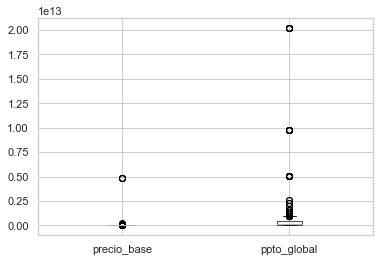

In [167]:

DF2017.boxplot()

plt.show()

In [168]:
#cuantil 2017

Cuantil_1 = DF2017.quantile(.25, axis = 0)
Cuantil_2 = DF2017.quantile(.50, axis = 0)
Cuantil_3 = DF2017.quantile(.75, axis = 0)

print(Cuantil_1)
print(Cuantil_2)
print(Cuantil_3)

precio_base    7.426300e+06
ppto_global    2.499872e+10
Name: 0.25, dtype: float64
precio_base    3.646160e+07
ppto_global    9.049768e+10
Name: 0.5, dtype: float64
precio_base    1.627817e+08
ppto_global    3.986698e+11
Name: 0.75, dtype: float64


In [169]:
DF2017.pivot_table(index="localizacion_desc")

,ppto_global,precio_base
localizacion_desc,,
Amazonas,3.915588e+09,1.457575e+06
Antioquia,1.176450e+11,6.411188e+08
Arauca,4.388424e+09,4.788489e+08
Bolívar,9.886744e+09,1.449700e+08
Boyacá,1.101607e+10,3.000000e+07
Casanare,5.214132e+09,2.065512e+08
Cauca,1.616176e+10,2.194221e+08
Cesar,1.440739e+10,3.975217e+08
Chocó,3.965046e+09,1.469710e+08


#### TOP 10 Departamentos con Mayor Precio base y Presupuesto Global (2017)

In [170]:
DF2017.groupby(['localizacion_desc']).agg({'precio_base':'mean'}).sort_values(by='precio_base',ascending=False).head(10)

,precio_base
localizacion_desc,
Distrito Capital de Bogotá,6.263538e+09
Valle del Cauca,3.037211e+09
Nariño,1.705526e+09
Antioquia,6.411188e+08
Tolima,5.265847e+08
Cundinamarca,4.957592e+08
Arauca,4.788489e+08
Cesar,3.975217e+08
"San Andrés, Providencia y Santa Catalina",2.908716e+08


In [171]:
DF2017.groupby(['localizacion_desc']).agg({'ppto_global':'mean'}).sort_values(by='ppto_global',ascending=False).head(10)

,ppto_global
localizacion_desc,
Distrito Capital de Bogotá,3.688002e+11
Norte de Santander,2.657355e+11
Antioquia,1.176450e+11
Santander,6.410954e+10
Cundinamarca,5.112106e+10
Valle del Cauca,2.947220e+10
Cauca,1.616176e+10
Cesar,1.440739e+10
Risaralda,1.376196e+10


### Año 2018

In [172]:
DFfiltrado.filter(regex='2018', axis=0)

,localizacion_desc,precio_base,ppto_global
year,,,
2018,Boyacá,2.200000e+08,8280682764
2018,Boyacá,4.235000e+06,29235000
2018,Boyacá,1.560000e+07,29235000
2018,Sucre,6.000000e+06,46282403778
2018,Sucre,7.392000e+06,46282403778
...,...,...,...
2018,Distrito Capital de Bogotá,1.112466e+09,171197197512
2018,Distrito Capital de Bogotá,3.622897e+09,171197197512
2018,Distrito Capital de Bogotá,1.112466e+09,171197197512


In [173]:
DF2018=DFfiltrado.filter(regex='2018', axis=0)

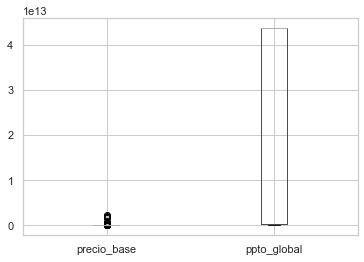

In [174]:
DF2018.boxplot()

plt.show()

In [175]:
#cuantil 2018

Cuantil_1 = DF2018.quantile(.25, axis = 0)
Cuantil_2 = DF2018.quantile(.50, axis = 0)
Cuantil_3 = DF2018.quantile(.75, axis = 0)

print(Cuantil_1)
print(Cuantil_2)
print(Cuantil_3)

precio_base    2.158200e+07
ppto_global    2.984167e+11
Name: 0.25, dtype: float64
precio_base    1.800000e+08
ppto_global    4.374209e+13
Name: 0.5, dtype: float64
precio_base    1.270000e+09
ppto_global    4.374209e+13
Name: 0.75, dtype: float64


In [176]:
DF2018.pivot_table(index="localizacion_desc")

,ppto_global,precio_base
localizacion_desc,,
Amazonas,2.390977e+09,2.698030e+07
Antioquia,7.045261e+11,1.175120e+08
Arauca,2.078782e+09,5.699581e+07
Atlántico,5.100962e+09,1.004046e+08
Bolívar,2.286626e+10,1.762550e+08
Boyacá,6.394639e+09,2.468345e+09
Caldas,1.620622e+11,1.604593e+09
Caquetá,5.767007e+09,1.357588e+07
Casanare,5.645220e+09,2.981042e+07


#### TOP 10 Departamentos con Mayor Precio base y Presupuesto Global (2018)

In [177]:
F2018.groupby(['localizacion_desc']).agg({'precio_base':'mean'}).sort_values(by='precio_base',ascending=False).head(10)

NameError: name 'F2018' is not defined

In [178]:
DF2018.groupby(['localizacion_desc']).agg({'ppto_global':'mean'}).sort_values(by='ppto_global',ascending=False).head(10)

,ppto_global
localizacion_desc,
Distrito Capital de Bogotá,3.092528e+13
Antioquia,7.045261e+11
Huila,2.136561e+11
Santander,2.104191e+11
Tolima,2.048949e+11
Caldas,1.620622e+11
Sucre,2.784676e+10
Cundinamarca,2.347420e+10
Bolívar,2.286626e+10


### Año 2019

In [179]:
DFfiltrado.filter(regex='2019', axis=0)

,localizacion_desc,precio_base,ppto_global
year,,,
2019,Tolima,1.994667e+07,2971812351
2019,Casanare,5.725000e+07,114339387326
2019,Santander,4.950000e+07,10926006500
2019,Santander,1.800000e+07,10926006500
2019,Santander,1.800000e+07,10926006500
...,...,...,...
2019,Boyacá,6.846935e+09,21425759225
2019,Boyacá,6.846935e+09,21425759225
2019,Boyacá,6.846935e+09,21425759225


In [180]:
DF2019=DFfiltrado.filter(regex='2019', axis=0)

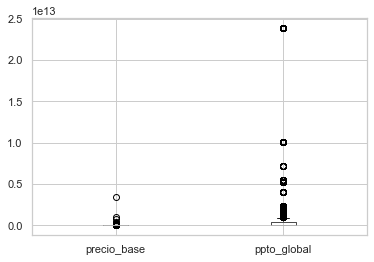

In [181]:
DF2019.boxplot()

plt.show()

In [182]:
#cuantil 2019

Cuantil_1 = DF2019.quantile(.25, axis = 0)
Cuantil_2 = DF2019.quantile(.50, axis = 0)
Cuantil_3 = DF2019.quantile(.75, axis = 0)

print(Cuantil_1)
print(Cuantil_2)
print(Cuantil_3)

precio_base    2.000000e+07
ppto_global    2.429779e+10
Name: 0.25, dtype: float64
precio_base    4.394500e+07
ppto_global    6.635008e+10
Name: 0.5, dtype: float64
precio_base    1.098717e+08
ppto_global    3.919471e+11
Name: 0.75, dtype: float64


In [183]:
DF2019.pivot_table(index="localizacion_desc")

,ppto_global,precio_base
localizacion_desc,,
Amazonas,6.051151e+10,8.301031e+09
Antioquia,7.934288e+11,5.655903e+08
Arauca,2.212940e+09,9.825756e+07
Atlántico,1.968708e+10,1.396725e+08
Bolívar,1.526944e+10,2.529096e+08
Boyacá,4.654665e+10,1.599344e+09
Caldas,7.867797e+10,3.664941e+08
Caquetá,7.956355e+09,2.968662e+08
Casanare,3.178402e+11,3.201774e+07


#### TOP 10 Departamentos con Mayor Precio base y Presupuesto Global (2019)

In [184]:
DF2019.groupby(['localizacion_desc']).agg({'precio_base':'mean'}).sort_values(by='precio_base',ascending=False).head(10)

,precio_base
localizacion_desc,
Cauca,1.046803e+10
Amazonas,8.301031e+09
Distrito Capital de Bogotá,2.169686e+09
Boyacá,1.599344e+09
Nariño,1.479300e+09
Córdoba,1.197736e+09
Vichada,6.940618e+08
Antioquia,5.655903e+08
Norte de Santander,4.723841e+08


In [185]:
DF2019.groupby(['localizacion_desc']).agg({'ppto_global':'mean'}).sort_values(by='ppto_global',ascending=False).head(10)

,ppto_global
localizacion_desc,
Antioquia,7.934288e+11
Distrito Capital de Bogotá,6.441059e+11
Tolima,5.705643e+11
Casanare,3.178402e+11
Vichada,1.872257e+11
Huila,1.712250e+11
Santander,1.238732e+11
Caldas,7.867797e+10
Cundinamarca,7.245917e+10


### Año 2020

In [186]:
DFfiltrado.filter(regex='2020', axis=0)

,localizacion_desc,precio_base,ppto_global
year,,,
2020,Cundinamarca,4.485000e+07,71581017
2020,Distrito Capital de Bogotá,1.336014e+09,15669935594
2020,Nariño,7.200000e+06,111120257
2020,Nariño,1.039030e+08,837770481
2020,Nariño,1.039030e+08,837770481
...,...,...,...
2020,Nariño,1.965103e+07,203961583
2020,Nariño,7.056552e+06,203961583
2020,Nariño,1.644113e+07,203961583


In [187]:
DF2019['precio_base_r']=map(lambda x: x.isalnum(), DF2019['precio_base'])


F:\Anaconfas\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
print(DF2019) 

type(DF2019)

               localizacion_desc   precio_base   ppto_global  \
year                                                           
2019                      Tolima  1.994667e+07    2971812351   
2019                    Casanare  5.725000e+07  114339387326   
2019                   Santander  4.950000e+07   10926006500   
2019                   Santander  1.800000e+07   10926006500   
2019                   Santander  1.800000e+07   10926006500   
...                          ...           ...           ...   
2019                      Boyacá  6.846935e+09   21425759225   
2019                      Boyacá  6.846935e+09   21425759225   
2019                      Boyacá  6.846935e+09   21425759225   
2019                      Boyacá  5.062643e+07   21425759225   
2019  Distrito Capital de Bogotá  2.000000e+07   24812202968   

                           precio_base_r  
year                                      
2019  <map object at 0x00000160B9524E48>  
2019  <map object at 0x00000160B9524E4

pandas.core.frame.DataFrame

In [189]:
DF2020=DFfiltrado.filter(regex='2020', axis=0)

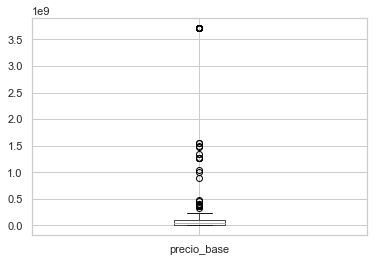

In [190]:
DF2020.boxplot(column=['precio_base'])
plt.show()

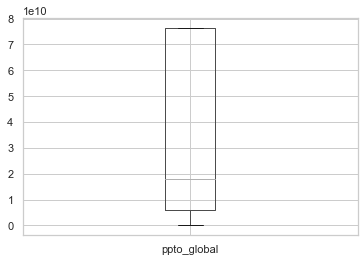

In [191]:
DF2020.boxplot(column=['ppto_global'])
plt.show()


In [192]:
#cuantil 2020

Cuantil_1 = DF2020.quantile(.25, axis = 0)
Cuantil_2 = DF2020.quantile(.50, axis = 0)
Cuantil_3 = DF2020.quantile(.75, axis = 0)

print(Cuantil_1)
print(Cuantil_2)
print(Cuantil_3)

precio_base    1.689303e+07
ppto_global    5.913761e+09
Name: 0.25, dtype: float64
precio_base    5.000000e+07
ppto_global    1.783394e+10
Name: 0.5, dtype: float64
precio_base    1.072084e+08
ppto_global    7.645697e+10
Name: 0.75, dtype: float64


In [193]:
DF2020.pivot_table(index="localizacion_desc")

,ppto_global,precio_base
localizacion_desc,,
Amazonas,5.100000e+07,2.500000e+07
Antioquia,5.796748e+09,1.517150e+09
Atlántico,3.535000e+09,1.900000e+08
Bolívar,8.271000e+09,2.583506e+07
Boyacá,3.758562e+07,1.879281e+07
Caldas,2.479406e+08,2.734822e+07
Casanare,5.719703e+07,5.319703e+07
Chocó,1.090424e+08,2.877245e+07
Cundinamarca,7.158102e+07,4.485000e+07


#### TOP 10 Departamentos con Mayor Precio base y Presupuesto Global (2020)

In [194]:
DF2020.groupby(['localizacion_desc']).agg({'precio_base':'mean'}).sort_values(by='precio_base',ascending=False).head(10)

,precio_base
localizacion_desc,
Antioquia,1.517150e+09
Norte de Santander,3.704273e+08
Córdoba,2.898776e+08
Atlántico,1.900000e+08
Risaralda,1.799636e+08
Vichada,1.019656e+08
Distrito Capital de Bogotá,9.327336e+07
Valle del Cauca,5.792041e+07
Nariño,5.637753e+07


In [195]:
DF2020.groupby(['localizacion_desc']).agg({'ppto_global':'mean'}).sort_values(by='ppto_global',ascending=False).head(10)

,ppto_global
localizacion_desc,
Distrito Capital de Bogotá,7.233229e+10
Valle del Cauca,1.783394e+10
Risaralda,1.174000e+10
Tolima,8.442486e+09
Bolívar,8.271000e+09
Antioquia,5.796748e+09
Córdoba,5.262291e+09
Atlántico,3.535000e+09
Norte de Santander,3.748048e+08


**Dataframe general (incluye todos los años) filtrado por Departamento**

In [196]:
DFcristian.pivot_table(index="localizacion_desc")

NameError: name 'DFcristian' is not defined

In [197]:
from IPython.display import Image

# CRISTAN SUBA LAS IMAGENES A JUPYTER Y CORRA EL CODIGO AGAIN (MENOS LO QUE DIGA NO CORRER, No nos sirve imagenes con path en un pc

Compilado TOP Departamentos por año

In [198]:
Image(filename = PATH + "L5.jpg", width=1200, height=500)

NameError: name 'PATH' is not defined

**Conclusiones:**

Sobre Precio Base

- Bogotá DF, lideró la lista desde el 2016 al 2019. En el año 2020 bajó al puesto 3
- Antioquia estuvo en el TOP 10 durante los 5 años en cuestión.
- Huila fue disminuyendo año tras año, hasta que en el 2019 ya sale del TOP 10.
- Valle del Cauca similiar situación a Tolima, en los últimos dos años no parece en el TOP 10.
- Respecto al sur del País colombiano, sólo el Valle del Cauca, Nariño y el Cauca hacen presencia en la lista durante los 5 años en cuestión.
- De la "Costa" del País sólo dos departamentos no aparecen en la lista en ninguno de los 5 años en cuestión Atlántico y Sucre.

Respecto a las conclusiones sobre la variable precio base se puede dar una ídea de los departamentos en donde podemos desarrollar la segmentación puesto que al tener claro cuanto se gasta,ahora la siguiente fase es realizar lo municipios de los Departamentos más atractivos y ya luego identificar las empresas de estos muncipios para así tomar una decisión final de que empresa necesita analítica.

Sobre Presupuesto Global
- Bogotá DF, lideró la lista 4 años, el único año en cuestión que no lideró fue el año 2018 ocupó la plaza tres.

**Referencias: contrato y operación**

In [199]:
DFReferencias1= df.filter(items=['localizacion_desc', 'year', 'ref_contrato', 'ref_operacion' ] )

In [200]:
DFReferencias1.head()

,localizacion_desc,year,ref_contrato
22,Tolima,2019,CD - 003
41,Casanare,2019,CRE-MT-SDS-016-2019
75,Santander,2019,004-2019
76,Santander,2019,015-2019
77,Santander,2019,017-2019


In [201]:
DFReferencias2= df.filter(items=['ref_contrato', 'ref_operacion' ] )

In [202]:
DFReferencias2.head()

,ref_contrato
22,CD - 003
41,CRE-MT-SDS-016-2019
75,004-2019
76,015-2019
77,017-2019


In [203]:
DFReferencias2.describe()

,ref_contrato
count,348130
unique,96383
top,LP-065-2018
freq,5906


In [204]:
DFReferencias3= df.filter(items=['year', 'ref_contrato', 'ref_operacion' ] )

In [205]:
DFReferencias3.head()

,year,ref_contrato
22,2019,CD - 003
41,2019,CRE-MT-SDS-016-2019
75,2019,004-2019
76,2019,015-2019
77,2019,017-2019


# Elimina las variables del df.